In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_parquet('/content/fhv_tripdata_2021-01.parquet')

In [3]:
df['duration'] = (df.dropOff_datetime - df.pickup_datetime).apply(lambda x: x.total_seconds() / 60)

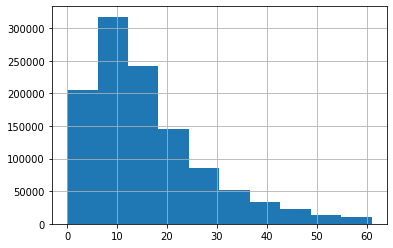

In [4]:
df.loc[df['duration'] < 61, 'duration'].hist()

In [5]:
data = df.loc[(df['duration'] >= 1) & (df['duration'] < 61)]

In [6]:
df.shape

(1154112, 8)

In [7]:
df2 = data.fillna(-1)

In [8]:
df2[df2['PUlocationID'] == -1].shape[0] / data.shape[0]

0.8351935819846193

In [9]:
df2['PUlocationID'] = df2['PUlocationID'].astype(str)

In [10]:
df2['DOlocationID'] = df2['DOlocationID'].astype(str)

In [11]:
df2[['PUlocationID', 'DOlocationID']].dtypes

PUlocationID    object
DOlocationID    object
dtype: object

In [12]:
train_dict = df2[['PUlocationID', 'DOlocationID']].to_dict(orient='records')

In [13]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [14]:
X_train

<1110873x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2221746 stored elements in Compressed Sparse Row format>

In [15]:
y = df2['duration'].values

In [16]:
model = LinearRegression()
model.fit(X_train, y)

LinearRegression()

In [17]:
np.sqrt(mean_squared_error(y, model.predict(X_train)))

10.596034496969224

In [18]:
test = pd.read_parquet('/content/fhv_tripdata_2021-02.parquet')

In [19]:
test['duration'] = (test.dropOff_datetime - test.pickup_datetime).apply(lambda x: x.total_seconds() / 60)
test = test.loc[(test['duration'] >= 1) & (test['duration'] < 61)]

In [20]:
test_data = test[['PUlocationID', 'DOlocationID', 'duration']].fillna(-1)

In [21]:
test_data['PUlocationID'] = test_data['PUlocationID'].astype(str)
test_data['DOlocationID'] = test_data['DOlocationID'].astype(str)

In [22]:
test_dict = test_data[['PUlocationID', 'DOlocationID']].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [23]:
y_test = test_data['duration'].values

In [24]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

11.09634287004778